In [143]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from cycler import cycler
from numpy import genfromtxt

import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
def speedup(tseq, tpar_nw):
    return tseq/tpar_nw
def scalability(tpar_1, tpar_nw):
    return tpar_1/tpar_nw
def efficency(tseq, tpar_nw, nw):
    return tseq/(nw*tpar_nw)

def plot_speedup(tseq, tpar_nw, nw, labels, title):
    fig, ax = plt.subplots()
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    # plot ideal
    plt.plot(np.linspace(0,32,2),np.linspace(0,32,2), label='Ideal', color='silver')
    
    for i in range(tseq.shape[0]):
        sp = speedup(tseq[i], tpar_nw[i,:])
        ax.plot(nw, sp, label = labels[i])

    plt.grid()
    plt.ylabel('SpeedUp(nw)')
    plt.xlabel('nw')
    plt.title(title)
    leg = ax.legend();
    plt.show()
    
def plot_scalability(tpar_1, tpar_nw, nw, labels, title):
    fig, ax = plt.subplots()
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    # plot ideal
    plt.plot(np.linspace(0,32,2),np.linspace(0,32,2), label='Ideal', color='silver')
    
    for i in range(tpar_1.shape[0]):
        s = scalability(tpar_1[i], tpar_nw[i,:])
        ax.plot(nw, s, label = labels[i])

    plt.grid()
    plt.ylabel('Scalability(nw)')
    plt.xlabel('nw')
    plt.title(title)
    leg = ax.legend();
    plt.show()

def plot_efficency(tseq, tpar_nw, nw, labels, title):
    fig, ax = plt.subplots()
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    # plot ideal
    plt.axhline(y=1, label='Ideal', color='silver')
    
    for i in range(tseq.shape[0]):
        e = efficency(tseq[i], tpar_nw[i,:], nw)
        ax.plot(nw, e, label = labels[i])

    plt.grid()
    plt.ylabel('SpeedUp(nw)')
    plt.xlabel('nw')
    plt.title(title)
    leg = ax.legend();
    plt.show()

In [2]:
!pwd

/Users/alessandro/Dev/repos/Jacobi-method/notebook


# Check vectorization

## verify sequatial case:

In [144]:
o3_seq_time_path = "../data/vectorization test/o3_seq_time.csv"
no_o3_seq_time_path = "../data/vectorization test/no_o3_seq_time.csv"

o3_seq_timeX = genfromtxt(o3_seq_time_path, delimiter=',')
no_o3_seq_timeX = genfromtxt(no_o3_seq_time_path, delimiter=',')

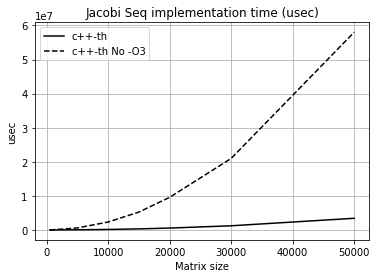

In [145]:
fig, ax = plt.subplots()

linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
plt.rc('axes', prop_cycle=linestyle_cycler)

matrix_size = o3_seq_timeX[:,0].astype(int)
t = (o3_seq_timeX[:,1])
ax.plot(matrix_size, t, label = "c++-th")

matrix_size = no_o3_seq_timeX[:,0].astype(int)
t = (no_o3_seq_timeX[:,1])
ax.plot(matrix_size, t, label = "c++-th No -O3")


plt.grid()
plt.ylabel('usec')
plt.xlabel('Matrix size')
plt.title("Jacobi Seq implementation time (usec)")
leg = ax.legend();
plt.show()

## verify with 32 workers:

In [165]:
o3_th_time_path = "../data/vectorization test/o3_th_n_30k_time.csv"
no_o3_th_time_path = "../data/vectorization test/no_o3_th_n_30k_time.csv"

o3_th_timeX = genfromtxt(o3_th_time_path, delimiter=',')[1]
no_o3_th_timeX = genfromtxt(no_o3_th_time_path, delimiter=',')[1]

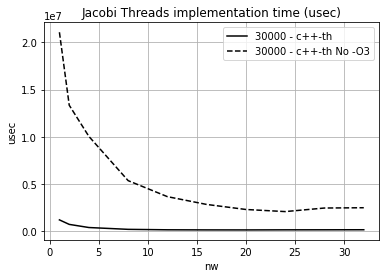

In [166]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
plt.rc('axes', prop_cycle=linestyle_cycler)

nw = [1,2,4, 8, 12, 16, 20, 24, 28, 32]
ax.plot(nw, o3_th_timeX[1:], label = "30000 - c++-th")
ax.plot(nw, no_o3_th_timeX[1:], label = "30000 - c++-th No -O3")


plt.grid()
plt.ylabel('usec')
plt.xlabel('nw')
plt.title("Jacobi Threads implementation time (usec)")
leg = ax.legend();
plt.show()

# SpeedUp, Scalability and Effecency analysis:

In [3]:
dataset_path = "../data/data_analysis_2.csv"
df = pd.read_csv(dataset_path)
dataset= df.to_dict('list')

# to numpy
X = np.array([ dataset[feature] for feature in dataset.keys()]).T
print(X.shape)

# divide data and takes only rows where matrix size = [1000, 10000, 20000, 50000]
index = [1,3,5,7]
matrix_size = X[:,0][index]
seq_times = X[:,1][index]
th_times = X[:,2:12][index]
ff_times = X[:,12:22][index]
nw = [1,2,4, 8, 12, 16, 20, 24, 28, 32]

In [50]:
print(X[0,:])
print(matrix_size[0])
print(seq_times[0])
print(th_times[0,:])
print(ff_times[0,:])

[  500.    248.8   359.1   231.    287.2  9455.7 15322.3 17857.2 34399.3
 65869.7 74435.7 92947.7   267.7   202.7   127.1   167.    150.2   545.5
 36035.9 36501.5 45372.4 54629.7     nan]
1000.0
1198.3
[ 1407.    966.4  1811.6  8832.9 17717.7 20937.9 37001.5 60231.9 77505.7
 91067.3]
[ 1128.7   626.7   770.3  1709.7   368.2   841.4 32599.  45251.1 48371.2
 46986.9]


# SpeedUp(nw)

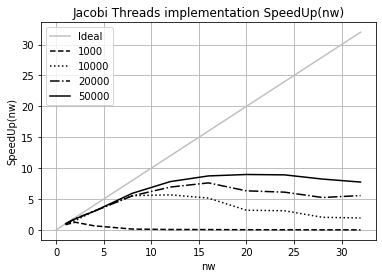

In [111]:
plot_speedup(seq_times,th_times,nw, matrix_size.astype(int), "Jacobi Threads implementation SpeedUp(nw)")

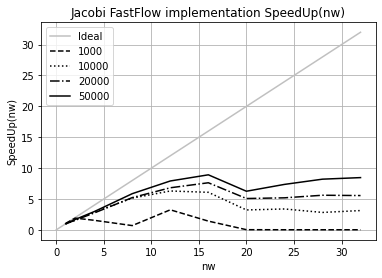

In [112]:
plot_speedup(seq_times, ff_times, nw, matrix_size.astype(int), "Jacobi FastFlow implementation SpeedUp(nw)")

# scalability

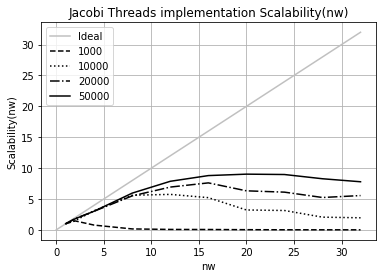

In [113]:
plot_scalability(th_times[:,0], th_times, nw, matrix_size.astype(int), "Jacobi Threads implementation Scalability(nw)")

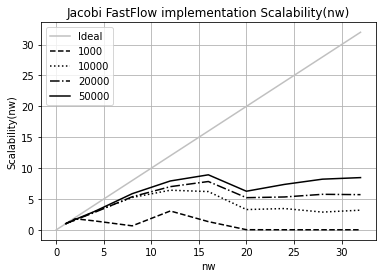

In [114]:
plot_scalability(ff_times[:,0], ff_times, nw, matrix_size.astype(int), "Jacobi FastFlow implementation Scalability(nw)")

# efficency

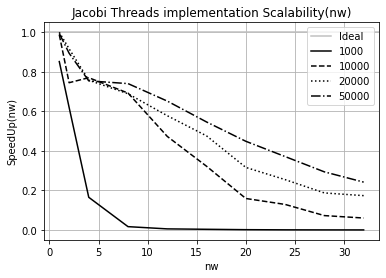

In [126]:
plot_efficency(seq_times, th_times, nw, matrix_size.astype(int), "Jacobi Threads implementation Scalability(nw)")

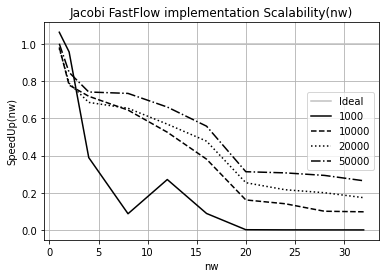

In [125]:
plot_efficency(seq_times, ff_times, nw, matrix_size.astype(int), "Jacobi FastFlow implementation Scalability(nw)")